# Odisha Ground Water Quality Analysis 

# 1.Bussiness/Real World Problem

### 1.1 Problem Statement

The chemical quality of ground water of Odisha has been evaluated by chemically analyzing water samples
collected from National Hydrograph Network Stations (NHNS). The water samples for
these purposes were collected in clean 1.0 litre polyethylene bottles after rinsing 2 to 3 times with the water
samples to be collected.
<br>
<br>
The samples were analysed for 14 parameters namely pH, Electrical Conductivity (EC),
Total Dissolved Solids (TDS), Total Hardness (TH), Alkalinity, Calcium (Ca), Magnesium (Mg), Sodium (Na),
Potassium (K), Carbonate (CO 3 ), Bicarbonate (HCO 3 ), Chloride (Cl), Sulphate (SO 4 ), and Fluoride (F)
<br>
<br>
<br>
Problem  - - <b>Odisha Ground Water Quality Analysis <b>
    
    

In [5]:
#from IPython.display import Image
#Image(filename ="1.jpg", width=600, height=100)

Image Source -   http://cgwb.gov.in/Regions/SER/Reports/GROUND%20WATER%20YEAR%20BOOK%202019_2020.pdf

### 1.2 Sources / Useful Links

To monitor the effect caused by indiscriminate use of this precious resource on groundwater regime, Central Ground
Water Board, South Eastern Region, Bhubaneswar has established about 1600 National Hydrograph Network
Stations (NHNS) (open / dug wells) and piezometres in the state of Odisha. The water levels are being monitored
four times a year. Besides, to study the change in chemical quality of groundwater in time and space, the water
samples from these NHNS are being collected once a year (Pre-monsoon) and analysed in the Water Quality
Laboratory of the Region.
<br>
<br>

Central Ground Water Year book - 
<br>
<br>
The data got extracted from the Report of <br>
Govt. of India <br>
Ministry of Jal Shakti <br>
Department of Water Resources, <br>
River Development & Ganga Rejuvenation <br>
CENTRAL GROUND WATER BOARD (2019-2020)

### 1.3 Real World Bussiness Objective 

1.Binary Classification <br>
2.Multi class Classification <br>


# 2.MACHINE LEARNING PROBLEM

## 2.1 Data 

### 2.1.1 Data Overview 

<li>PH(potential of hydrogen)</li> pH is a scale used to specify the acidity or basicity of an aqueous solution.

<li>Electrical Conductivity (EC)</li>Measurement of the dissolved material in an aqueous solution, which relates to the ability of the material to conduct electrical current through it.

<li>Total Dissolved Solids (TDS)</li>used to describe the inorganic salts and small amounts of organic matter present in solution in water.

<li>Total Hardness (TH)</li>measurement of calcium and magnesium, and is expressed as calcium carbonate; our body needs both Ca and Mg to remain healthy.

<li>Alkalinity</li>Alkalinity is the strength of a buffer solution composed of weak acids and their conjugate bases. 

<li>Calcium (Ca)</li>
<li>Magnesium (Mg)</li>
<li>Sodium (Na)</li>
<li>Potassium (K)</li>
<li>Carbonate (CO 3 )</li>
<li>Bicarbonate (HCO 3 )</li>
<li>Chloride (Cl)</li>
<li>Sulphate (SO 4)</li>
<li>Fluoride (F)</li>

### 2.1.2   STANDARDS

## 2.2 Mapping the real-world problem to an ML problem 

### 2.2.1 Type of Machine Leaning Problem 

1. It can be a binary class problem where we can check whether all the parameters within permissible limit.
2. It can be multiclass classification problem where we calculate the WQI which is a standard way determining        quality of water.

## 3.EXPLORATORY DATA ANALYSIS 

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import time
import warnings

### 3.1 Importing the Data 

In [7]:
import pandas as pd
df= pd.read_csv('water_quality.csv')
print('No:of Unique Districts where water samples are collected:',len(df.District.unique()))
print('No:of Unique Villages where water samples are collected:',len(df.Village.unique()))

No:of Unique Districts where water samples are collected: 30
No:of Unique Villages where water samples are collected: 1210


In [8]:
print(df.isna().sum())

SL NO.         0
District       0
Village        0
pH             0
EC             0
TDS            0
TH             0
Alkalinity     0
Calcium        0
Magnesium      0
Sodium         0
Potassium      0
Carbonate      0
Bicarbonate    0
Chloride       0
Sulphate       0
Fluoride       0
dtype: int64


In [9]:
df.describe()

,SL NO.,pH,EC,TDS,TH,Alkalinity,Calcium,Magnesium,Sodium,Potassium,Carbonate,Bicarbonate,Chloride,Sulphate,Fluoride
count,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000
mean,621.000000,7.828622,695.439283,358.057212,215.015310,178.496374,43.941982,25.617244,49.991942,13.162530,1.258662,215.799355,92.170024,26.223207,0.398517
std,358.390151,0.399608,536.819062,280.979343,156.787273,104.932014,30.612192,25.835135,61.033544,29.670994,6.597529,126.507379,127.144334,30.662012,0.419844
min,1.000000,6.460000,7.150000,30.000000,20.000000,15.000000,0.000000,-4.000000,0.000000,0.000000,0.000000,18.000000,0.000000,-3.000000,0.020000
25%,311.000000,7.580000,360.000000,186.000000,123.000000,105.000000,26.000000,10.000000,17.000000,1.600000,0.000000,128.000000,26.000000,4.000000,0.160000
50%,621.000000,7.900000,550.000000,277.000000,184.000000,158.000000,39.000000,19.000000,30.000000,3.800000,0.000000,192.000000,55.000000,17.000000,0.270000
75%,931.000000,8.120000,900.000000,456.000000,267.000000,228.000000,53.000000,34.000000,65.000000,10.100000,0.000000,275.000000,110.000000,38.000000,0.470000
max,1241.000000,8.780000,5770.000000,2766.000000,1945.000000,765.000000,497.000000,345.000000,820.000000,332.000000,88.000000,933.000000,1753.000000,434.000000,3.940000


<b>
OBSERVATION : 

1. 50 percentile of the data have pH <= 7.9
2. 50 percentile of the data have EC <= 550
3. 50 percentile and 75 percentile of the data have Carbonate = 0 (Almost all the data have Carbonate Value 0)
    ===> We can drop Carbonate as most of the values are 0 and if there is any value then it may be an outlier.
4. Similarly we can observe 25,50 and 75 percentile of the dataset.

(Percentiles are used in statistics to give you a number that describes the value that a given percent of the values are lower than.)

<b>    

In [10]:
df.drop(['SL NO.','Carbonate'], axis = 1,inplace=True)

In [11]:
df

,District,Village,pH,EC,TDS,TH,Alkalinity,Calcium,Magnesium,Sodium,Potassium,Bicarbonate,Chloride,Sulphate,Fluoride
0,Angul,Chauliakata,7.22,210.0,105,85,60,22,7,5,4.2,73,21,10,0.27
1,Angul,Godibandha,7.54,310.0,157,100,85,20,12,21,4.8,104,43,5,0.12
2,Angul,Samal,8.08,580.0,282,125,200,20,18,72,3.5,244,21,28,1.52
3,Angul,Sipur,8.25,390.0,191,150,145,34,16,16,5.7,177,30,3,0.31
4,Angul,Khamar-1,7.64,460.0,234,165,125,42,15,26,5.0,153,71,0,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236,Sundargarh,R-33 Sector 18,8.22,340.0,176,93,82,31,4,31,4.4,100,34,23,0.14
1237,Sundargarh,R-34 Sector-17,7.90,240.0,118,93,49,18,12,8,4.5,60,41,5,0.14
1238,Sundargarh,R-36 Sector-15,8.27,340.0,156,147,131,29,18,9,2.2,160,14,5,0.26
1239,Sundargarh,R-37 Vedvyas,8.26,740.0,378,270,126,77,19,44,1.5,154,156,5,0.21


In [12]:
df.describe()

,pH,EC,TDS,TH,Alkalinity,Calcium,Magnesium,Sodium,Potassium,Bicarbonate,Chloride,Sulphate,Fluoride
count,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000
mean,7.828622,695.439283,358.057212,215.015310,178.496374,43.941982,25.617244,49.991942,13.162530,215.799355,92.170024,26.223207,0.398517
std,0.399608,536.819062,280.979343,156.787273,104.932014,30.612192,25.835135,61.033544,29.670994,126.507379,127.144334,30.662012,0.419844
min,6.460000,7.150000,30.000000,20.000000,15.000000,0.000000,-4.000000,0.000000,0.000000,18.000000,0.000000,-3.000000,0.020000
25%,7.580000,360.000000,186.000000,123.000000,105.000000,26.000000,10.000000,17.000000,1.600000,128.000000,26.000000,4.000000,0.160000
50%,7.900000,550.000000,277.000000,184.000000,158.000000,39.000000,19.000000,30.000000,3.800000,192.000000,55.000000,17.000000,0.270000
75%,8.120000,900.000000,456.000000,267.000000,228.000000,53.000000,34.000000,65.000000,10.100000,275.000000,110.000000,38.000000,0.470000
max,8.780000,5770.000000,2766.000000,1945.000000,765.000000,497.000000,345.000000,820.000000,332.000000,933.000000,1753.000000,434.000000,3.940000


In [13]:
pH=[]
for i in range(len(df)):
  if (df['pH'][i]>=6.5 and df['pH'][i]<=8.5):
    pH.append(1)
  else:
    pH.append(0)

In [14]:
count=0
for i in range(len(pH)):
  if pH[i]==1:
    count+=1
print(count)

1223


In [15]:
EC=[]
for i in range(len(df)):
  if df['EC'][i]<=1000:
    EC.append(1)
  else:
    EC.append(0)

In [16]:
count=0
for i in range(len(EC)):
  if EC[i]==1:
    count+=1
print(count)

1001


In [17]:
TDS=[]
for i in range(len(df)):
  if df['TDS'][i]<=500:
    TDS.append(1)
  else:
    TDS.append(0)

In [18]:
count=0
for i in range(len(TDS)):
  if TDS[i]==1:
    count+=1
print(count)

984


In [19]:
TH=[]
for i in range(len(df)):
  if df['TH'][i]<=300:
    TH.append(1)
  else:
    TH.append(0)

In [20]:
count=0
for i in range(len(TH)):
  if TH[i]==1:
    count+=1
print(count)

1000


In [21]:
Alkalinity=[]
for i in range(len(df)):
  if df['Alkalinity'][i]<=200:
    Alkalinity.append(1)
  else:
    Alkalinity.append(0)

In [22]:
count=0
for i in range(len(Alkalinity)):
  if Alkalinity[i]==1:
    count+=1
print(count)

838


In [23]:
Calcium  =[]
for i in range(len(df)):
  if df['Calcium'][i]<=75:
    Calcium.append(1)
  else:
    Calcium.append(0)

In [24]:
count=0
for i in range(len(Calcium)):
  if Calcium[i]==1:
    count+=1
print(count)

1127


In [25]:
Magnesium = []
for i in range(len(df)):
  if df['Magnesium'][i]<=50:
    Magnesium.append(1)
  else:
    Magnesium.append(0)

In [26]:
count=0
for i in range(len(Magnesium)):
  if Magnesium[i]==1:
    count+=1
print(count)

1112


In [27]:
Sodium   = []
for i in range(len(df)):
  if df['Sodium'][i]<=200:
    Sodium.append(1)
  else:
    Sodium.append(0)

In [28]:
count=0
for i in range(len(Sodium)):
  if Sodium[i]==1:
    count+=1
print(count)

1207


In [29]:
Potassium = []
for i in range(len(df)):
  if df['Potassium'][i]<=12:
    Potassium.append(1)
  else:
    Potassium.append(0)

In [30]:
count=0
for i in range(len(Potassium)):
  if Potassium[i]==1:
    count+=1
print(count)

973


In [31]:
Bicarbonate = []
for i in range(len(df)):
  #if (df['Bicarbonate'][i]>=110 and df['Bicarbonate'][i]<=350) :
  if (df['Bicarbonate'][i]<=350) :
    Bicarbonate.append(1)
  else:
    Bicarbonate.append(0)

In [32]:
count=0
for i in range(len(Bicarbonate)):
  if Bicarbonate[i]==1:
    count+=1
print(count)
#848

1075


In [33]:
Chloride = []  
for i in range(len(df)):
  if df['Chloride'][i]<= 250 :
    Chloride.append(1)
  else:
    Chloride.append(0)    

In [34]:
count=0
for i in range(len(Chloride)):
  if Chloride[i]==1:
    count+=1
print(count)

1157


In [35]:
Sulphate = []      
for i in range(len(df)):
  if df['Sulphate'][i]<= 200 :
    Sulphate.append(1)
  else:
    Sulphate.append(0)    

In [36]:
count=0
for i in range(len(Sulphate)):
  if Sulphate[i]==1:
    count+=1
print(count)

1238


In [37]:
Fluoride = []

for i in range(len(df)):
  if  df['Fluoride'][i]<=1.5 :
    Fluoride.append(1)
  else:
    Fluoride.append(0)

In [38]:
count=0
for i in range(len(Fluoride)):
  if Fluoride[i]==1:
    count+=1
print(count)

1205


In [39]:
is_drinkable=[]
for i in range(len(df)):
  if (pH[i]==EC[i]==TDS[i]==TH[i]==Alkalinity[i]==Calcium[i]==Magnesium[i]==Sodium[i]==Potassium[i]==Bicarbonate[i]==Chloride[i]==Sulphate[i]==Fluoride[i]):
    is_drinkable.append(1)
  else:
    is_drinkable.append(0)


In [40]:
count = 0
for i in range(len(is_drinkable)):
  if is_drinkable[i] == 1:
    count+=1
print(count)
#406

656


In [41]:
df['is_drinkable'] = is_drinkable

In [42]:
df

,District,Village,pH,EC,TDS,TH,Alkalinity,Calcium,Magnesium,Sodium,Potassium,Bicarbonate,Chloride,Sulphate,Fluoride,is_drinkable
0,Angul,Chauliakata,7.22,210.0,105,85,60,22,7,5,4.2,73,21,10,0.27,1
1,Angul,Godibandha,7.54,310.0,157,100,85,20,12,21,4.8,104,43,5,0.12,1
2,Angul,Samal,8.08,580.0,282,125,200,20,18,72,3.5,244,21,28,1.52,0
3,Angul,Sipur,8.25,390.0,191,150,145,34,16,16,5.7,177,30,3,0.31,1
4,Angul,Khamar-1,7.64,460.0,234,165,125,42,15,26,5.0,153,71,0,0.15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236,Sundargarh,R-33 Sector 18,8.22,340.0,176,93,82,31,4,31,4.4,100,34,23,0.14,1
1237,Sundargarh,R-34 Sector-17,7.90,240.0,118,93,49,18,12,8,4.5,60,41,5,0.14,1
1238,Sundargarh,R-36 Sector-15,8.27,340.0,156,147,131,29,18,9,2.2,160,14,5,0.26,1
1239,Sundargarh,R-37 Vedvyas,8.26,740.0,378,270,126,77,19,44,1.5,154,156,5,0.21,0


In [43]:
df['is_drinkable'].value_counts()

1    656
0    585
Name: is_drinkable, dtype: int64

In [44]:
df.shape

(1241, 16)

In [45]:
df.info

<bound method DataFrame.info of         District         Village    pH     EC  TDS   TH  Alkalinity  Calcium  \
0          Angul     Chauliakata  7.22  210.0  105   85          60       22   
1          Angul      Godibandha  7.54  310.0  157  100          85       20   
2          Angul           Samal  8.08  580.0  282  125         200       20   
3          Angul           Sipur  8.25  390.0  191  150         145       34   
4          Angul        Khamar-1  7.64  460.0  234  165         125       42   
...          ...             ...   ...    ...  ...  ...         ...      ...   
1236  Sundargarh  R-33 Sector 18  8.22  340.0  176   93          82       31   
1237  Sundargarh  R-34 Sector-17  7.90  240.0  118   93          49       18   
1238  Sundargarh  R-36 Sector-15  8.27  340.0  156  147         131       29   
1239  Sundargarh    R-37 Vedvyas  8.26  740.0  378  270         126       77   
1240  Sundargarh    R-38 Kalunga  8.24  340.0  173  152          77       51   

      M

In [46]:
df.columns

Index(['District', 'Village', 'pH', 'EC', 'TDS', 'TH', 'Alkalinity', 'Calcium',
       'Magnesium', 'Sodium', 'Potassium', 'Bicarbonate', 'Chloride',
       'Sulphate', 'Fluoride', 'is_drinkable'],
      dtype='object')

In [47]:
#pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=677473954b2e76b25096d371128b3570a984a5788ca39f0f7fe6c5304fb4697b
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


In [48]:
import pandasql
sub_data = pandasql.sqldf("SELECT District,is_drinkable, COUNT(District) FROM df GROUP BY District,is_drinkable ", globals())
#sub_data

In [49]:
#  standard value recommended for parameter
si= 8.5+1000+500+300+200+75+30+200+12+350+250+200+1.5
print(si)
k=1/si
print(k)

3127.0
0.0003197953309881676


In [50]:
values=[8.5,1000,500,300,200,75,30,200,12,350,250,200,1.5]
wi=[]
for i in values:
  wi.append(k/i)
#wi

In [51]:
pHn=[]
for i in df['pH']:
  pHn.append(100*((i-7.0)/(8.5-7.0)))
#pHn

In [52]:
ECn=[]
for i in df['EC']:
  ECn.append(100*((i)/(1000)))
#ECn

In [53]:
TDSn=[]
for i in df['TDS']:
  TDSn.append(100*((i)/(500)))
#TDSn

In [54]:
THn=[]
for i in df['TH']:
  THn.append(100*((i)/(300)))
#THn

In [55]:
Alkalinityn=[]
for i in df['Alkalinity']:
  Alkalinityn.append(100*((i)/(200)))
#Alkalinityn

In [56]:
Calciumn=[]
for i in df['Calcium']:
  Calciumn.append(100*((i)/(75)))
#Calciumn

In [57]:
Magnesiumn=[]
for i in df['Magnesium']:
  Magnesiumn.append(100*((i)/(50)))
#Magnesiumn

In [58]:
Sodiumn=[]
for i in df['Sodium']:
  Sodiumn.append(100*((i)/(200)))
#Sodiumn

In [59]:
Potassiumn=[]
for i in df['Potassium']:
  Potassiumn.append(100*((i)/(12)))
#Potassiumn

In [60]:
Bicarbonaten=[]
for i in df['Bicarbonate']:
  Bicarbonaten.append(100*((i)/(350)))
#Bicarbonaten

In [61]:
Chloriden=[]
for i in df['Chloride']:
  Chloriden.append(100*((i)/(250)))
#Chloriden

In [62]:
Sulphaten=[]
for i in df['Sulphate']:
  Sulphaten.append(100*((i)/(200)))
#Sulphaten

In [63]:
Fluoriden=[]
for i in df['Fluoride']:
  Fluoriden.append(100*((i)/(1.5)))
#Fluoriden

In [64]:
wqi=[]
for i in range(len(df)):
  wqi.append( (   (pHn[i]*wi[0]) + (ECn[i]*wi[1]) +(TDSn[i]*wi[2])  +(THn[i]*wi[3])  +(Alkalinityn[i]*wi[4])  +(Calciumn[i]*wi[5])  +(Magnesiumn[i]*wi[6])  +(Sodiumn[i]*wi[7])  +(Potassiumn[i]*wi[8])  +(Bicarbonaten[i]*wi[9])  +(Chloriden[i]*wi[10]) +(Sulphaten[i]*wi[11])  +(Fluoriden[i]*wi[12])  )  /    ( wi[0]+wi[1]+wi[2]+wi[3]+wi[4]+wi[5]+wi[6]+wi[7]+wi[8]+wi[9]+wi[10]+wi[11]+wi[12]  ) )

In [65]:
len(wqi)

1241

In [66]:
df['WQI'] = wqi

In [67]:
#for i in range(len(df)):
#  if df['WQI'][i] > 51:
  #  print(df.iloc[i])
#df.iloc[2]

In [68]:
wqc=[]
for i in range(len(df)):
    res = ""
    if df["WQI"][i] >= 0 and df["WQI"][i] <= 25:
        res = "Excellent"
    elif df["WQI"][i] > 25 and df["WQI"][i] <= 50:
        res = "Good"
    elif df["WQI"][i] >50 and df["WQI"][i] <= 75:
        res = "Poor"
    elif df["WQI"][i] >75 :
        res = "Very Poor"
   
        
    wqc.append(res)

In [69]:
df['WQC'] = wqc

In [70]:
df['WQC'].value_counts()

Good         513
Excellent    436
Poor         173
Very Poor    119
Name: WQC, dtype: int64

In [71]:
df.head(10)

,District,Village,pH,EC,TDS,TH,Alkalinity,Calcium,Magnesium,Sodium,Potassium,Bicarbonate,Chloride,Sulphate,Fluoride,is_drinkable,WQI,WQC
0,Angul,Chauliakata,7.22,210.0,105,85,60,22,7,5,4.2,73,21,10,0.27,1,19.032351,Excellent
1,Angul,Godibandha,7.54,310.0,157,100,85,20,12,21,4.8,104,43,5,0.12,1,15.589984,Excellent
2,Angul,Samal,8.08,580.0,282,125,200,20,18,72,3.5,244,21,28,1.52,0,86.264578,Very Poor
3,Angul,Sipur,8.25,390.0,191,150,145,34,16,16,5.7,177,30,3,0.31,1,31.931635,Good
4,Angul,Khamar-1,7.64,460.0,234,165,125,42,15,26,5.0,153,71,0,0.15,1,18.932642,Excellent
5,Angul,Srirampur,7.88,390.0,196,160,105,36,17,15,1.2,128,60,4,0.27,1,23.675539,Excellent
6,Angul,Pallahara,7.99,480.0,244,145,110,34,15,41,1.8,134,72,15,0.11,1,17.458106,Excellent
7,Angul,Jamardihi,7.62,90.0,43,40,25,10,4,1,0.7,31,10,2,0.13,1,12.470002,Excellent
8,Angul,Sendhogram,7.81,820.0,428,200,245,24,34,95,2.2,299,82,44,1.59,0,88.117828,Very Poor
9,Angul,Bhogabereni,7.42,2440.0,1292,515,425,78,78,312,20.6,519,363,186,0.94,0,74.916497,Poor


In [72]:
df2=df.drop(['District','Village','WQC','is_drinkable'], axis =1)
df3=df.drop(['District','Village','WQC','is_drinkable'], axis =1)
df3.shape

(1241, 14)

In [73]:
df3

,pH,EC,TDS,TH,Alkalinity,Calcium,Magnesium,Sodium,Potassium,Bicarbonate,Chloride,Sulphate,Fluoride,WQI
0,7.22,210.0,105,85,60,22,7,5,4.2,73,21,10,0.27,19.032351
1,7.54,310.0,157,100,85,20,12,21,4.8,104,43,5,0.12,15.589984
2,8.08,580.0,282,125,200,20,18,72,3.5,244,21,28,1.52,86.264578
3,8.25,390.0,191,150,145,34,16,16,5.7,177,30,3,0.31,31.931635
4,7.64,460.0,234,165,125,42,15,26,5.0,153,71,0,0.15,18.932642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236,8.22,340.0,176,93,82,31,4,31,4.4,100,34,23,0.14,21.589240
1237,7.90,240.0,118,93,49,18,12,8,4.5,60,41,5,0.14,19.066396
1238,8.27,340.0,156,147,131,29,18,9,2.2,160,14,5,0.26,27.092631
1239,8.26,740.0,378,270,126,77,19,44,1.5,154,156,5,0.21,25.709087


# EDA part  ..... (To be shifted to top before model implementation)......

## Outlier Detection

In [74]:
#!conda install seaborn

/bin/bash: conda: command not found


In [75]:
plt.boxplot

<function matplotlib.pyplot.boxplot(x, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, meanline=None, showmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None, *, data=None)>

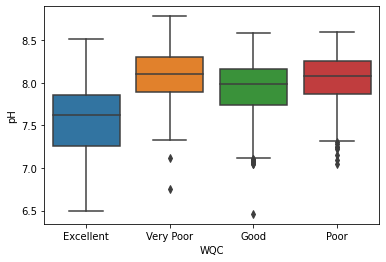

In [76]:
import seaborn as sns
sns.boxplot(x='WQC',y='pH', data=df)
plt.show()

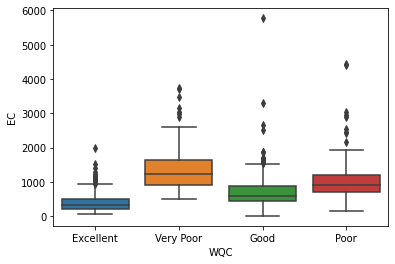

In [77]:
import seaborn as sns
sns.boxplot(x='WQC',y='EC', data=df)
plt.show()

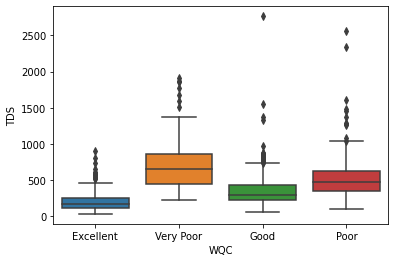

In [78]:
import seaborn as sns
sns.boxplot(x='WQC',y='TDS', data=df)
plt.show()

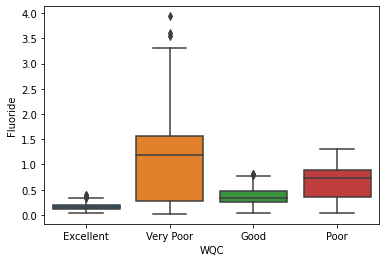

In [79]:
import seaborn as sns
sns.boxplot(x='WQC',y='Fluoride', data=df)
plt.show()

In [80]:
df.corr()

,pH,EC,TDS,TH,Alkalinity,Calcium,Magnesium,Sodium,Potassium,Bicarbonate,Chloride,Sulphate,Fluoride,is_drinkable,WQI
pH,1.000000,0.151216,0.161410,0.107877,0.298009,0.049762,0.123624,0.137161,0.150997,0.273391,0.039890,0.136458,0.265736,-0.177312,0.400070
EC,0.151216,1.000000,0.985947,0.852030,0.676578,0.650262,0.789482,0.807153,0.405042,0.678108,0.890348,0.659697,0.291466,-0.618706,0.580675
TDS,0.161410,0.985947,1.000000,0.826257,0.676252,0.641328,0.757618,0.833648,0.443433,0.677087,0.901407,0.679796,0.281660,-0.610951,0.600764
TH,0.107877,0.852030,0.826257,1.000000,0.512589,0.796832,0.901382,0.438834,0.184382,0.516758,0.816914,0.535142,0.219161,-0.538213,0.377814
Alkalinity,0.298009,0.676578,0.676252,0.512589,1.000000,0.335106,0.515389,0.607893,0.406312,0.996108,0.331832,0.425314,0.402246,-0.655714,0.640992
Calcium,0.049762,0.650262,0.641328,0.796832,0.335106,1.000000,0.456872,0.274097,0.177394,0.337272,0.649724,0.403362,0.065860,-0.416380,0.238792
Magnesium,0.123624,0.789482,0.757618,0.901382,0.515389,0.456872,1.000000,0.450607,0.144815,0.519994,0.737350,0.499691,0.276124,-0.495182,0.385981
Sodium,0.137161,0.807153,0.833648,0.438834,0.607893,0.274097,0.450607,1.000000,0.283461,0.607977,0.697448,0.594887,0.348391,-0.475173,0.497639
Potassium,0.150997,0.405042,0.443433,0.184382,0.406312,0.177394,0.144815,0.283461,1.000000,0.398840,0.276782,0.315489,-0.077269,-0.345361,0.699994
Bicarbonate,0.273391,0.678108,0.677087,0.516758,0.996108,0.337272,0.519994,0.607977,0.398840,1.000000,0.335917,0.422975,0.395374,-0.652450,0.628981


## UNivariate analysis (Scatter plot to visualize Outliers)

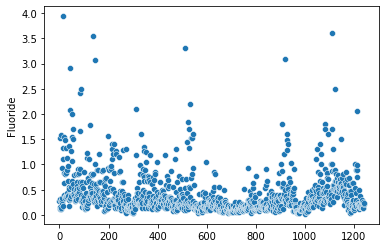

In [81]:
import seaborn as sns
sns.scatterplot(data=df, x=df.index, y= df["Fluoride"])


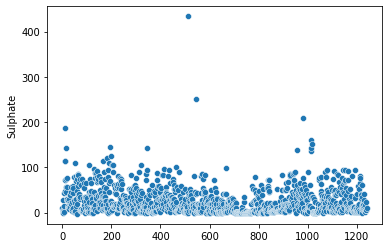

In [82]:
sns.scatterplot(data=df, x=df.index, y= df["Sulphate"])

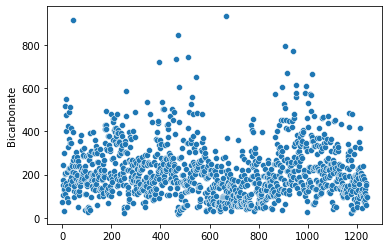

In [83]:
sns.scatterplot(data=df, x=df.index, y= df["Bicarbonate"])

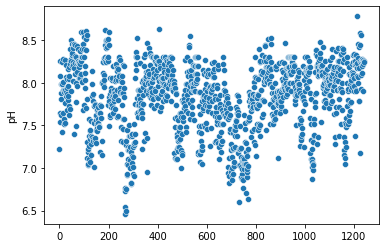

In [84]:
sns.scatterplot(data=df, x=df.index, y= df["pH"])

ph > 8.5, ph< 6.5 are outliers

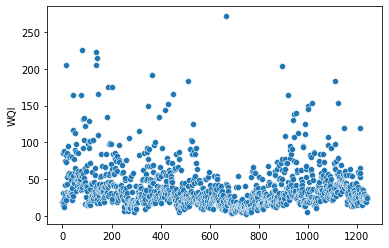

In [85]:
sns.scatterplot(data=df, x=df.index, y= df["WQI"])

In [123]:
df.describe()

,pH,EC,TDS,TH,Alkalinity,Calcium,Magnesium,Sodium,Potassium,Bicarbonate,Chloride,Sulphate,Fluoride,is_drinkable,WQI
count,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000
mean,7.828622,695.439283,358.057212,215.015310,178.496374,43.941982,25.617244,49.991942,13.162530,215.799355,92.170024,26.223207,0.398517,0.528606,39.525147
std,0.399608,536.819062,280.979343,156.787273,104.932014,30.612192,25.835135,61.033544,29.670994,126.507379,127.144334,30.662012,0.419844,0.499382,30.856464
min,6.460000,7.150000,30.000000,20.000000,15.000000,0.000000,-4.000000,0.000000,0.000000,18.000000,0.000000,-3.000000,0.020000,0.000000,2.920809
25%,7.580000,360.000000,186.000000,123.000000,105.000000,26.000000,10.000000,17.000000,1.600000,128.000000,26.000000,4.000000,0.160000,0.000000,20.472506
50%,7.900000,550.000000,277.000000,184.000000,158.000000,39.000000,19.000000,30.000000,3.800000,192.000000,55.000000,17.000000,0.270000,1.000000,30.772091
75%,8.120000,900.000000,456.000000,267.000000,228.000000,53.000000,34.000000,65.000000,10.100000,275.000000,110.000000,38.000000,0.470000,1.000000,47.567048
max,8.780000,5770.000000,2766.000000,1945.000000,765.000000,497.000000,345.000000,820.000000,332.000000,933.000000,1753.000000,434.000000,3.940000,1.000000,271.422875


In [126]:
df['WQC'].value_counts()/1241*100

Good         41.337631
Excellent    35.132957
Poor         13.940371
Very Poor     9.589041
Name: WQC, dtype: float64

# Distribution of each class in percent

1.   Good     -    **41.337631**  (ie- 41% datapoint have good water)
2.   Excellent -   **35.132957**
3.   Poor       -  **13.940371**
4.   Very Poor   -  **9.589041**




# Support Vector Machine

In [86]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import numpy as np

### SCALING THE DATA ( Pre Processing)

- Min Max Scaler is used here but.. better to use Zscore as Zscore is capable in handling outliers 

In [87]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
numeric=["pH","EC","TDS","TH","Alkalinity","Calcium","Magnesium","Sodium","Potassium","Bicarbonate","Chloride","Sulphate","Fluoride"]
for column in numeric:
    scaler.fit(df3[column].values.reshape(-1,1))
    df3[column]=scaler.transform(df3[column].values.reshape(-1,1))
        

In [88]:
df3.head(2)     # Normalized Data

,pH,EC,TDS,TH,Alkalinity,Calcium,Magnesium,Sodium,Potassium,Bicarbonate,Chloride,Sulphate,Fluoride,WQI
0,0.327586,0.035200,0.027412,0.033766,0.060000,0.044266,0.031519,0.006098,0.012651,0.060109,0.011979,0.029748,0.063776,19.032351
1,0.465517,0.052552,0.046418,0.041558,0.093333,0.040241,0.045845,0.025610,0.014458,0.093989,0.024529,0.018307,0.025510,15.589984


In [89]:
X = df3.iloc[:,0:13]
y = df.iloc[:,17:18]

In [90]:
X.head(2)

,pH,EC,TDS,TH,Alkalinity,Calcium,Magnesium,Sodium,Potassium,Bicarbonate,Chloride,Sulphate,Fluoride
0,0.327586,0.035200,0.027412,0.033766,0.060000,0.044266,0.031519,0.006098,0.012651,0.060109,0.011979,0.029748,0.063776
1,0.465517,0.052552,0.046418,0.041558,0.093333,0.040241,0.045845,0.025610,0.014458,0.093989,0.024529,0.018307,0.025510


In [91]:
y.head(2)

,WQC
0,Excellent
1,Excellent


# MODEL TRAINING

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 1)

# 1. SVM (4)

In [93]:
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [94]:
linear_pred = linear.predict(X_test)
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
sig_pred = sig.predict(X_test)

In [95]:
accuracy_lin = linear.score(X_test, y_test)
accuracy_poly = poly.score(X_test, y_test)
accuracy_rbf = rbf.score(X_test, y_test)
accuracy_sig = sig.score(X_test, y_test)

In [96]:
accuracy_lin

0.7550200803212851

In [97]:
accuracy_poly 

0.9036144578313253

In [98]:
accuracy_rbf

0.7791164658634538

In [99]:
accuracy_sig 

0.27309236947791166

In [100]:
cm_lin = confusion_matrix(y_test, linear_pred)
cm_poly = confusion_matrix(y_test, poly_pred)
cm_rbf = confusion_matrix(y_test, rbf_pred)
cm_sig = confusion_matrix(y_test, sig_pred)

0.7550200803212851
              precision    recall  f1-score   support

   Excellent       0.89      0.82      0.86        90
        Good       0.70      0.90      0.79        97
        Poor       0.46      0.37      0.41        35
   Very Poor       1.00      0.52      0.68        27

    accuracy                           0.76       249
   macro avg       0.76      0.65      0.68       249
weighted avg       0.77      0.76      0.75       249



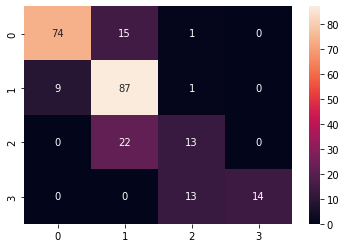

In [101]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

sns.heatmap(cm_lin, annot=True)

result2 = accuracy_score(y_test, linear_pred)
print(result2)

result1 = classification_report(y_test, linear_pred)
print (result1)

0.9036144578313253
              precision    recall  f1-score   support

   Excellent       0.89      0.92      0.91        90
        Good       0.91      0.90      0.90        97
        Poor       0.87      0.94      0.90        35
   Very Poor       1.00      0.81      0.90        27

    accuracy                           0.90       249
   macro avg       0.92      0.89      0.90       249
weighted avg       0.91      0.90      0.90       249



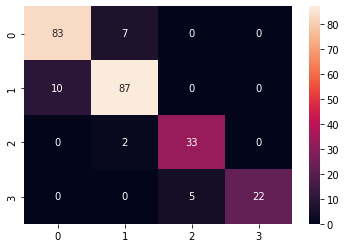

In [102]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

sns.heatmap(cm_poly, annot=True)

result2 = accuracy_score(y_test, poly_pred)
print(result2)

result1 = classification_report(y_test, poly_pred)
print (result1)

0.7791164658634538
              precision    recall  f1-score   support

   Excellent       0.86      0.83      0.85        90
        Good       0.73      0.87      0.79        97
        Poor       0.61      0.49      0.54        35
   Very Poor       0.95      0.67      0.78        27

    accuracy                           0.78       249
   macro avg       0.79      0.71      0.74       249
weighted avg       0.78      0.78      0.78       249



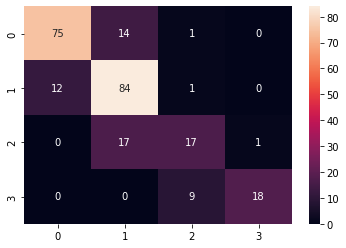

In [103]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

sns.heatmap(cm_rbf, annot=True)

result2 = accuracy_score(y_test, rbf_pred)
print(result2)

result1 = classification_report(y_test, rbf_pred)
print (result1)

0.27309236947791166
              precision    recall  f1-score   support

   Excellent       0.31      0.64      0.42        90
        Good       0.41      0.09      0.15        97
        Poor       0.06      0.03      0.04        35
   Very Poor       0.00      0.00      0.00        27

    accuracy                           0.27       249
   macro avg       0.19      0.19      0.15       249
weighted avg       0.28      0.27      0.22       249



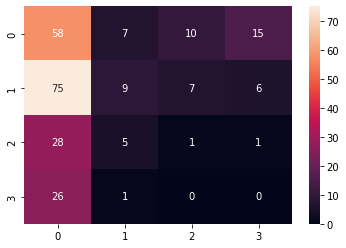

In [104]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

sns.heatmap(cm_sig, annot=True)

result2 = accuracy_score(y_test,sig_pred)
print(result2)

result1 = classification_report(y_test, sig_pred)
print (result1)

# 2. KNN

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [106]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test) #These are the predicted output value

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [107]:
ypred=knn_clf.predict(X_test)

0.7590361445783133
              precision    recall  f1-score   support

   Excellent       0.88      0.83      0.86        90
        Good       0.69      0.88      0.77        97
        Poor       0.57      0.37      0.45        35
   Very Poor       0.89      0.59      0.71        27

    accuracy                           0.76       249
   macro avg       0.76      0.67      0.70       249
weighted avg       0.76      0.76      0.75       249



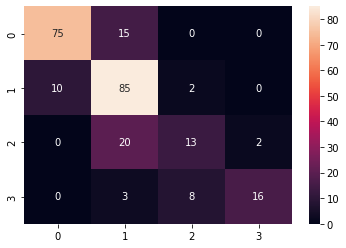

In [108]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)

sns.heatmap(result, annot=True)

result2 = accuracy_score(y_test,ypred)
print(result2)

result1 = classification_report(y_test, ypred)
print (result1)

# 3. Logistic Regression

In [109]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(random_state=0).fit(X_train, y_train)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [110]:
lr_clf.fit(X_train,y_train)
ypred=lr_clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [111]:
ypred=lr_clf.predict(X_test)

0.6987951807228916
              precision    recall  f1-score   support

   Excellent       0.83      0.78      0.80        90
        Good       0.61      0.84      0.70        97
        Poor       0.50      0.23      0.31        35
   Very Poor       0.94      0.56      0.70        27

    accuracy                           0.70       249
   macro avg       0.72      0.60      0.63       249
weighted avg       0.71      0.70      0.68       249



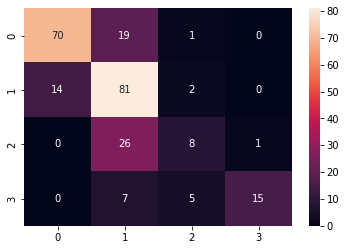

In [112]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)

sns.heatmap(result, annot=True)

result2 = accuracy_score(y_test,ypred)
print(result2)

result1 = classification_report(y_test, ypred)
print (result1)

# 4. Decision tree

In [113]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print('accuracy score is')
accuracy_score(y_test, predictions)

accuracy score is


0.9076305220883534

In [114]:
#pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 842 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.7-py3-none-any.whl size=68151 sha256=47c14382790c0750e8d1afa4cd96111e9014c5846aca589feb2cea22537d637d
  Stored in directory: /root/.cache/pip/wheels/bf/ba/9f/87c689d8d3c2916793f2dccc57d3dc3b283e0ccf8cb4ca4cad
Successfully built dtreeviz


In [115]:
m='''from dtreeviz.trees import dtreeviz # remember to load the package
viz = dtreeviz(model, X, df2,
                target_name="WQC",
                feature_names=df.columns,
                title="Wine data set classification",
                class_names=['1', '2', '3', '4',],
                histtype='barstacked', # default 
                scale=1.2)
viz'''

0.9076305220883534
              precision    recall  f1-score   support

   Excellent       0.94      0.94      0.94        90
        Good       0.88      0.92      0.90        97
        Poor       0.84      0.77      0.81        35
   Very Poor       0.96      0.93      0.94        27

    accuracy                           0.91       249
   macro avg       0.91      0.89      0.90       249
weighted avg       0.91      0.91      0.91       249



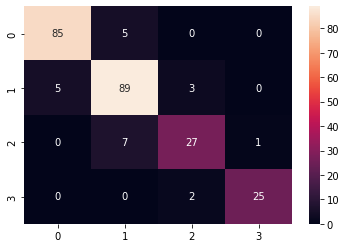

In [116]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, predictions)

sns.heatmap(result, annot=True)

result2 = accuracy_score(y_test,predictions)
print(result2)

result1 = classification_report(y_test, predictions)
print (result1)

# Using Boosting Algorithms

### 1. ADABOOST

In [117]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=100, base_estimator= None,learning_rate=1, random_state = 1)
adaboost.fit(X_train,y_train)

Y_pred = adaboost.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [118]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,Y_pred)
accuracy = float(cm.diagonal().sum())/len(y_test)
print("\nAccuracy Of AdaBoost For The Given Dataset : ", accuracy)


Accuracy Of AdaBoost For The Given Dataset :  0.5461847389558233


0.5461847389558233
              precision    recall  f1-score   support

   Excellent       0.65      0.40      0.50        90
        Good       0.51      0.82      0.63        97
        Poor       0.39      0.31      0.35        35
   Very Poor       1.00      0.33      0.50        27

    accuracy                           0.55       249
   macro avg       0.64      0.47      0.49       249
weighted avg       0.60      0.55      0.53       249



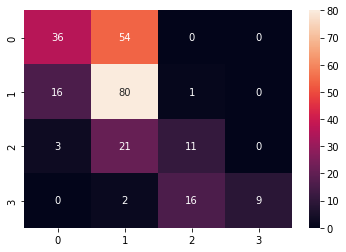

In [119]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, Y_pred)

sns.heatmap(result, annot=True)

result2 = accuracy_score(y_test,Y_pred)
print(result2)

result1 = classification_report(y_test, Y_pred)
print (result1)

In [120]:
#pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 2. XgBoost

In [121]:
import xgboost as xgb

xgb_cl = xgb.XGBClassifier()

from sklearn.metrics import accuracy_score

# Init classifier
xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)

# Score
print(accuracy_score(y_test, preds))


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9357429718875502


accuracy is  0.9357429718875502
              precision    recall  f1-score   support

   Excellent       0.95      0.97      0.96        90
        Good       0.93      0.93      0.93        97
        Poor       0.89      0.89      0.89        35
   Very Poor       1.00      0.93      0.96        27

    accuracy                           0.94       249
   macro avg       0.94      0.93      0.93       249
weighted avg       0.94      0.94      0.94       249



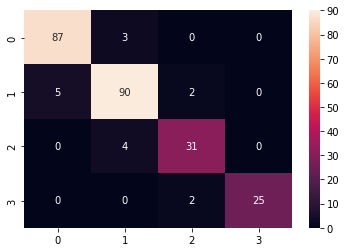

In [122]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, preds)
#print(confusion_matrix(y_test, preds))

sns.heatmap(result, annot=True)

result2 = accuracy_score(y_test,preds)
print("accuracy is ",result2)
result1 = classification_report(y_test, preds)
print (result1)
